In [1]:
import numpy as np
import copy
import random
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# input parameters
imax = 200
cmax = 100
dmax = 100
alpha = 0.9 #cooling
beta = 1.2 #reheating
T = 0.01


def f1(x):
    return x**2 
def f2(x:int):
    return (x-2)**2

def is_dominant(a,b):
    if(f1(a)<f1(b) and f2(a)<f2(b)):
        return True
    else:
        return False

def energy(x,newx,archive): #in this case new x being x' as well as Ax_ being Ax'
    A_ = calc_A_(x,newx,archive)
    Ax = calc_Ax(A_,x)
    Ax_ = calc_Ax_(A_,newx)
    deltaE = (Ax_-Ax)/len(A_)
    return deltaE
    
def calc_A_(x,newx,archive):
    A_ = copy.copy(archive)
    A_.append(x)
    A_.append(newx)
    return A_
        
def calc_Ax(A_,x):
    num = 0
    for i,element in enumerate(A_):
        if is_dominant(element,x):
            num+=1
    return num
    
def calc_Ax_(A_,newx):
    num = 0
    for i,element in enumerate(A_):
        if is_dominant(element,newx):
            num+=1
    return num
    

def generate_sol(x):
    neighbour = random.uniform(-0.5,0.5)+x
    return neighbour
        
def remove_dominated(archive,x):
    for i,sol in enumerate(archive):
        if(is_dominant(x,sol)):
            #print("removing")
            archive.remove(sol)
    return archive

def calc_end(archive):
    num=0
    for i,element in enumerate(archive):
        if(0<element<2):
            num+=1
    return num
    
r_min = -10**3
r_max = 10**3

In [3]:
archive = []
old_archive = []
i=1
c=0
d=0
t=1
accepted = 0
iterations = 9000
#x = np.random.uniform(r_max,r_min)
x= -999
print("Starting point =",x)
archive.append(x)
while(True):
    if(i==imax): #step 1
        print("Break out")
        break
    
    if(d==dmax): #step 2
        #increase temp
        #print("increase Temp")
        T = beta*T
        i+=1
        c=0
        d=0
        continue
        
    if(c==cmax): #step 3
        #decrease temp
        #print("decrease Temp")
        T = alpha*T
        d=0
        i+=1
        c=0
        continue
        
    newx = generate_sol(x) #newx = x' step 4
    
    rando = np.random.uniform(0,1) #step 5
    Px = min(1,math.exp(-energy(x,newx,archive)/T))
    if(rando>Px):
        #print("reject")
        t+=1
        d+=1
        continue
    
    x=newx #step 6
    c+=1 #step 7
    
    A_ = calc_A_(x,newx,archive) #step 8
    num_dom = calc_Ax(A_,x)
    if(num_dom==0):
        accepted+=1
        #print("num_dom=",num_dom," appending")
        archive.append(x)
        archive = remove_dominated(archive,x)
        #print("length of arch=",len(archive))
    
    if(calc_end(archive)>=100):
        print("eneough points in the front")
        break

    
    t+=1 #step 9
    
print("t reached = ",t)

Starting point = -999
eneough points in the front
t reached =  8275


## Paramter tuning

-Starting temperature: High starting temp allows more acceptance of bad solutions. Changing the temperature between 0.1 and 10 had no meaningful effect on the number of iterations required to reach a final solution (always around 8000 when starting from a fixed point for testing purposes).

-Epoch length: static epoch lengths only work well if set high enough and combined with other end criterion. Otherwise the wide starting range means that there can either be not enough epochs allowed before mapping the front appropriatley or far too many and computation time is wasted plotting thousands of points on the front.

-Cooling and heating schedule: Linear and geometric did not make a meaningful difference on teh final amount of iterations required.

-Search termination criterion: Previous was a static amount of iterations that are allowed, this was a hit or miss tactic depending on how many iterations were required. A better implementation was to calculate the amount of points that had already been mapped to the Pareto front and if that amount exceeded some threshold then the algortithm was terminated. This produced good results more consistently due to the fixed "resoltuion" with which the front is mapped. This also allows the resoltuion of the front to be tightly controlled.

In [4]:
len(archive) #the amount of points found on the pareto front before end criterion reached

102

In [5]:
x_axis = []
y_axis = []
for i, element in enumerate(archive):
    x_axis.append(f1(element))
    y_axis.append(f2(element))


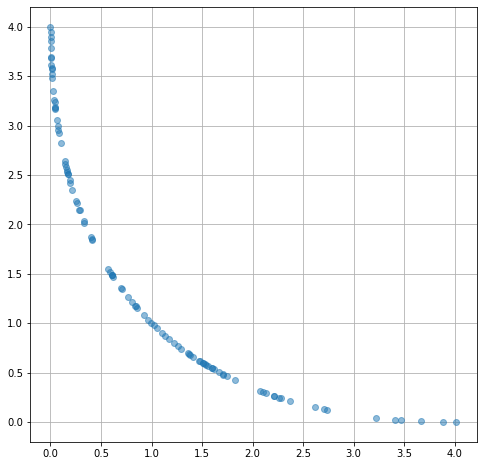

In [6]:
figure(figsize=(8,8))
plt.plot(x_axis,y_axis,marker = 'o',alpha=0.5,ls="")
plt.grid()

In [7]:
len(archive)


102

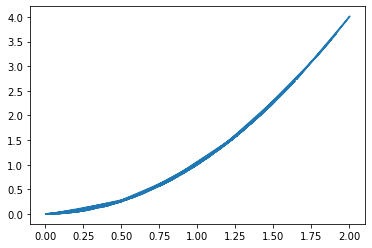

In [8]:
plt.plot(archive,x_axis)
#the pareto optimal set graphed with x^2

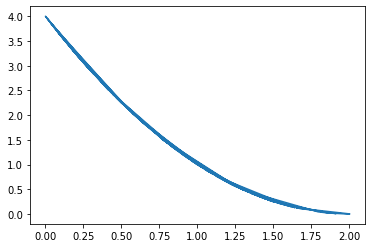

In [9]:
plt.plot(archive,y_axis)
#the pareto optimal set graphed with (x-2)^2